In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [45]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.shape

(42000, 785)

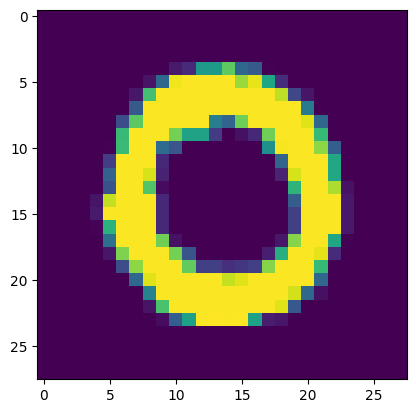

In [47]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1,1:].values.reshape(28,28))





In [48]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [67]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)
x_train_trf.shape

(29400, 100)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_trf,y_train)
y_pred=knn.predict(x_test_trf)


In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9526190476190476

In [ ]:
'''for i in range (1,785):
    pca=PCA(n_components=i)
    x_train_trf=pca.fit_transform(x_train)
    x_test_trf=pca.transform(x_test)

    knn=KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_pred=knn.predict(x_test_trf)
    print(accuracy_score(y_test,y_pred))''''''

In [70]:
pca=PCA(n_components=2)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)
print(x_train_trf)


[[-6.50554305  2.71997801]
 [-0.18902484 -2.65142539]
 [ 4.91174549  8.57420603]
 ...
 [ 2.08012307  0.82284546]
 [ 0.97784392  1.01757247]
 [17.74327484  1.83892229]]


In [72]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=x_train_trf[:,0],
              y=x_train_trf[:,1],
              color=y_train_trf,
              color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [73]:
pca=PCA(n_components=3)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)
print(x_train_trf)

[[-6.5055131   2.72003949 -0.39146428]
 [-0.18901685 -2.65159455 -0.90517757]
 [ 4.91168816  8.57394728 -0.74873369]
 ...
 [ 2.08009274  0.82346267 -0.73241604]
 [ 0.97783806  1.01717482  3.93853918]
 [17.74324876  1.83853008 -4.94180207]]


In [74]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(x=x_train_trf[:,0],
              y=x_train_trf[:,1],z=x_train_trf[:,2],
              
              color=y_train_trf
              )
fig.show()

In [75]:
pca.explained_variance_


array([40.88572671, 29.24344582, 26.65306566])

In [77]:
pca.components_.shape

(3, 784)

In [79]:
pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)


In [82]:
pca.explained_variance_.shape

(784,)

In [84]:
pca.components_.shape

(784, 784)

In [85]:
pca.explained_variance_ratio_

array([5.84897511e-02, 4.18346943e-02, 3.81289832e-02, 2.99200328e-02,
       2.60321908e-02, 2.26841320e-02, 1.98714817e-02, 1.77245856e-02,
       1.58429541e-02, 1.44502080e-02, 1.37345992e-02, 1.23510497e-02,
       1.15923398e-02, 1.12471898e-02, 1.06234089e-02, 1.02997156e-02,
       9.62139856e-03, 9.46688349e-03, 9.17814457e-03, 8.98547493e-03,
       8.45985095e-03, 8.26509243e-03, 7.89425997e-03, 7.61666677e-03,
       7.48361843e-03, 7.06394330e-03, 7.02300167e-03, 6.76636919e-03,
       6.48376554e-03, 6.35922866e-03, 6.20968672e-03, 6.08695723e-03,
       5.89465802e-03, 5.81075702e-03, 5.75861079e-03, 5.55605215e-03,
       5.45031564e-03, 5.33469579e-03, 5.17639756e-03, 4.96796404e-03,
       4.92901646e-03, 4.86451183e-03, 4.67105574e-03, 4.64957911e-03,
       4.59551423e-03, 4.54977001e-03, 4.50578675e-03, 4.41456384e-03,
       4.37267797e-03, 4.32370297e-03, 4.25312028e-03, 4.20163441e-03,
       4.14737057e-03, 4.05616612e-03, 4.03764230e-03, 3.93272707e-03,
      

In [86]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05848975, 0.10032445, 0.13845343, 0.16837346, 0.19440565,
       0.21708978, 0.23696127, 0.25468585, 0.27052881, 0.28497901,
       0.29871361, 0.31106466, 0.322657  , 0.33390419, 0.3445276 ,
       0.35482732, 0.36444872, 0.3739156 , 0.38309374, 0.39207922,
       0.40053907, 0.40880416, 0.41669842, 0.42431509, 0.43179871,
       0.43886265, 0.44588565, 0.45265202, 0.45913579, 0.46549502,
       0.4717047 , 0.47779166, 0.48368632, 0.48949707, 0.49525568,
       0.50081174, 0.50626205, 0.51159675, 0.51677315, 0.52174111,
       0.52667013, 0.53153464, 0.53620569, 0.54085527, 0.54545079,
       0.55000056, 0.55450634, 0.55892091, 0.56329359, 0.56761729,
       0.57187041, 0.57607204, 0.58021941, 0.58427558, 0.58831322,
       0.59224595, 0.59615753, 0.59998365, 0.60378401, 0.60750363,
       0.611202  , 0.61484538, 0.61844555, 0.62196812, 0.62541147,
       0.62882638, 0.63221453, 0.63558391, 0.63891834, 0.64220963,
       0.64547644, 0.64870651, 0.65192064, 0.65504799, 0.65816

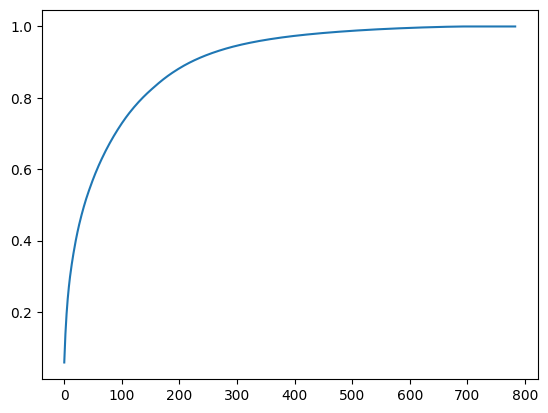

In [88]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))